# Mount Google Drive & Load Data


In [1]:
# Import necessary libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for statistical data visualization
import warnings
warnings.filterwarnings("ignore")

# Mount Google Drive to access files stored in it
from google.colab import drive  # for accessing Google Drive in Colab
drive.mount('/content/drive')  # mount the drive to access the dataset

# Load CSV files into DataFrames
# Loading different CSV files related to the retail data
df_stores = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/stores.csv')  # Store information (stores dataset)
df_oil = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/oil.csv')  # Oil prices data (used for sales analysis)
df_transactions = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/transactions.csv')  # Store transactions data
df_holidays_events = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/holidays_events.csv')  # Holidays and events data
df_items = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/items.csv')  # Item information (product details)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load & Filter train.csv in Chunks


In [2]:
# Filter store numbers for the 'Guayas' state
# Extract the unique store numbers from the 'Guayas' state in the stores dataframe
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Define the item families we want to filter: 'GROCERY I', 'BEVERAGES', 'CLEANING'
item_families = ['GROCERY I', 'BEVERAGES', 'CLEANING']

# Get item numbers that belong to the specified item families
items_ids = df_items[df_items['family'].isin(item_families)]

# Select data before April'14
max_date = '2014-04-01'

# Chunk size
chunk_size = 10**6

# Create an empty list to store filtered chunks of data
filtered_chunks = []

# Loop through each chunk of data (for large dataset processing)
for chunk in pd.read_csv('/content/drive/My Drive/retail_kaggle_data/train.csv', chunksize=chunk_size, parse_dates=["date"]):
    # Filter the chunk based on store numbers, item numbers
    # Conditions:
    # - Store numbers should be in 'Guayas' state
    # - Item numbers should belong to the selected item families
    chunk_filtered = chunk[(chunk['store_nbr'].isin(store_ids))]
    chunk_filtered = chunk_filtered[(chunk_filtered['date'] < max_date)]
    chunk_filtered = chunk_filtered.merge(items_ids, on="item_nbr", how="inner")

    # Append the filtered chunk to the list of filtered chunks
    filtered_chunks.append(chunk_filtered)

    # Delete the chunk to free up memory (important for large datasets)
    del chunk

# Combine all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up the memory by deleting the list of filtered chunks
del filtered_chunks

In [3]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,18790,2013-01-02,24,105574,12.0,NaN,GROCERY I,1045,0
1,18791,2013-01-02,24,105575,2.0,NaN,GROCERY I,1045,0
2,18792,2013-01-02,24,105577,1.0,NaN,GROCERY I,1045,0
3,18793,2013-01-02,24,105693,7.0,NaN,GROCERY I,1034,0
4,18794,2013-01-02,24,105737,17.0,NaN,GROCERY I,1044,0


In [4]:
df_train.shape

(2747275, 9)

In [5]:
df_train.describe()

,id,date,store_nbr,item_nbr,unit_sales,class,perishable
count,2.747275e+06,2747275,2.747275e+06,2.747275e+06,2.747275e+06,2.747275e+06,2747275.0
mean,1.071884e+07,2013-08-29 22:05:01.240175360,3.252720e+01,6.717266e+05,7.113536e+00,1.533735e+03,0.0
min,1.879000e+04,2013-01-02 00:00:00,2.400000e+01,9.699500e+04,-6.200000e+01,1.002000e+03,0.0
25%,5.533892e+06,2013-05-13 00:00:00,2.700000e+01,3.550910e+05,2.000000e+00,1.034000e+03,0.0
50%,1.066611e+07,2013-09-04 00:00:00,3.000000e+01,6.837230e+05,3.000000e+00,1.072000e+03,0.0
75%,1.588297e+07,2013-12-22 00:00:00,3.500000e+01,9.877690e+05,7.000000e+00,1.146000e+03,0.0
max,2.165654e+07,2014-03-31 00:00:00,5.100000e+01,1.466049e+06,2.935000e+03,3.090000e+03,0.0
std,6.135138e+06,NaN,8.122298e+00,3.561204e+05,1.407951e+01,8.413682e+02,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747275 entries, 0 to 2747274
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  object        
 6   family       object        
 7   class        int64         
 8   perishable   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 188.6+ MB


In [7]:
df_train.duplicated().sum()

np.int64(0)

# Handle Missing Values

In [8]:
# Print missing values before handling
print("Missing values in train dataset:")
print(df_train.isna().sum(), '\n')  # Checking missing values in df_train

print("Missing values in oil dataset:")
print(df_oil.isna().sum(), '\n')  # Checking missing values in df_oil

print("Missing values in transactions dataset:")
print(df_transactions.isna().sum(), '\n')  # Checking missing values in df_transactions

print("Missing values in holidays_events dataset:")
print(df_holidays_events.isna().sum(), '\n')  # Checking missing values in df_holidays_events

print("Missing values in items dataset:")
print(df_items.isna().sum(), '\n')  # Checking missing values in df_items

print("Missing values in stores dataset:")
print(df_stores.isna().sum(), '\n')  # Checking missing values in df_stores

# Fill missing values in `onpromotion` column in df_train
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)  # Assuming missing means not on promotion

# Fill missing values in `dcoilwtico` column in df_oil using backward fill (bfill)
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].bfill()  # Using the next valid value to fill missing oil prices

# Print missing values after handling
print("Missing values in train dataset after handling:")
print(df_train.isna().sum(), '\n')

print("Missing values in oil dataset after handling:")
print(df_oil.isna().sum(), '\n')

Missing values in train dataset:
id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    2747275
family               0
class                0
perishable           0
dtype: int64 

Missing values in oil dataset:
date           0
dcoilwtico    43
dtype: int64 

Missing values in transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64 

Missing values in holidays_events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 

Missing values in items dataset:
item_nbr      0
family        0
class         0
perishable    0
dtype: int64 

Missing values in stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 

Missing values in train dataset after handling:
id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family    

# Handle Negative Sales (Returns)

In [9]:
# Identify negative sales before correction
negative_sales_before = df_train[df_train['unit_sales'] < 0]
print("Negative sales before correction:")
print(negative_sales_before.head(), '\n')

# Replace negative sales with 0 (treat returns as no sales)
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: max(x, 0))

# Verify that there are no negative sales after correction
negative_sales_after = df_train[df_train['unit_sales'] < 0]
if negative_sales_after.empty:
    print("All negative sales have been corrected successfully.")
else:
    print("Negative sales still present after correction:")
    print(negative_sales_after.head())

Negative sales before correction:
           id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
13289  106658 2013-01-04         34    586824        -2.0        False   
38690  309805 2013-01-09         35   1079215        -8.0        False   
45715  382905 2013-01-11         27   1097187       -20.0        False   
68451  564108 2013-01-15         51    627885       -36.0        False   
94237  787522 2013-01-21         24    211205        -5.0        False   

          family  class  perishable  
13289   CLEANING   3090           0  
38690   CLEANING   3022           0  
45715  GROCERY I   1042           0  
68451  GROCERY I   1030           0  
94237  GROCERY I   1072           0   

All negative sales have been corrected successfully.


In [10]:
df_train.shape

(2747275, 9)

# Check Unique Stores & Items

In [11]:
# Print unique stores in filtered data compared to original
print(f"Unique stores in filtered data: {df_train['store_nbr'].nunique()} out of {df_stores['store_nbr'].nunique()} stores in the original dataset.")

# Print unique items in filtered data compared to original
print(f"Unique items in filtered data: {df_train['item_nbr'].nunique()} out of {df_items['item_nbr'].nunique()} items in the original dataset.")

Unique stores in filtered data: 10 out of 54 stores in the original dataset.
Unique items in filtered data: 1449 out of 4100 items in the original dataset.


# Detect & Handle Outliers Using Z-Score

In [12]:
# Compute mean and standard deviation for each store-item group
mean_sales = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform('mean')
std_sales = df_train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform('std')

# Avoid division by zero by replacing 0 std with 1 (and fill NaNs with 1)
std_sales = std_sales.replace(0, 1).fillna(1)

# Calculate Z-score for each sale
df_train['z_score'] = (df_train['unit_sales'] - mean_sales) / std_sales

# Define the threshold for outliers (Z-score > 5 indicates an extreme outlier)
outliers = df_train[df_train['z_score'] > 5]
print(f"Number of outliers detected (Z-score > 5): {len(outliers)}")

# Display the first few outliers for inspection
outliers.head()

Number of outliers detected (Z-score > 5): 7092


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,z_score
25,18821,2013-01-02,24,119026,80.0,False,CLEANING,3026,0,5.054672
61,18869,2013-01-02,24,168989,63.0,False,GROCERY I,1028,0,6.669638
708,20644,2013-01-02,26,115850,20.0,False,GROCERY I,1004,0,5.269974
920,20904,2013-01-02,26,470625,13.0,False,CLEANING,3046,0,5.001470
1241,21419,2013-01-02,27,116017,39.0,False,GROCERY I,1072,0,5.324187


In [13]:
df_train = df_train[df_train['z_score'] <= 5]

In [14]:
df_train.shape

(2740183, 10)

#  Fill missing dates with zero sales

In [15]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

# Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_train['date'].min()
max_date = df_train['date'].max()

# Generate a full date range from min_date to max_date (daily frequency)
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})

# Create a DataFrame with all (store, item, date) combinations by merging store-item pairs with full date range
store_item_combinations = df_train[['store_nbr', 'item_nbr']].drop_duplicates()
all_combinations = store_item_combinations.merge(full_date_range, how='cross')

# Merge the full combinations with the original df_train to fill in missing sales for specific dates
df_filled = all_combinations.merge(df_train, on=['store_nbr', 'item_nbr', 'date'], how='left')

# Fill missing sales values with 0 (for days with no sales)
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Increase maximum column width and show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 200)         # Widen total display width (characters)
pd.set_option('display.max_colwidth', 50)   # Increase column content width

# Check the first few rows of the filled DataFrame
print(df_filled.head())

   store_nbr  item_nbr       date        id  unit_sales onpromotion     family   class  perishable   z_score
0         24    105574 2013-01-02   18790.0        12.0       False  GROCERY I  1045.0         0.0  0.552982
1         24    105574 2013-01-03   59692.0         1.0       False  GROCERY I  1045.0         0.0 -0.993237
2         24    105574 2013-01-04   99664.0         3.0       False  GROCERY I  1045.0         0.0 -0.712106
3         24    105574 2013-01-05  140805.0         4.0       False  GROCERY I  1045.0         0.0 -0.571541
4         24    105574 2013-01-06  182800.0         7.0       False  GROCERY I  1045.0         0.0 -0.149845


In [16]:
df_filled.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,family,class,perishable,z_score
0,24,105574,2013-01-02,18790.0,12.0,False,GROCERY I,1045.0,0.0,0.552982
1,24,105574,2013-01-03,59692.0,1.0,False,GROCERY I,1045.0,0.0,-0.993237
2,24,105574,2013-01-04,99664.0,3.0,False,GROCERY I,1045.0,0.0,-0.712106
3,24,105574,2013-01-05,140805.0,4.0,False,GROCERY I,1045.0,0.0,-0.571541
4,24,105574,2013-01-06,182800.0,7.0,False,GROCERY I,1045.0,0.0,-0.149845


In [17]:
df_filled.shape

(5219638, 10)

In [18]:
df_filled.describe()

,store_nbr,item_nbr,date,id,unit_sales,class,perishable,z_score
count,5.219638e+06,5.219638e+06,5219638,2.740183e+06,5.219638e+06,2.740183e+06,2740183.0,2.740183e+06
mean,3.235018e+01,7.867453e+05,2013-08-16 11:59:59.999999744,1.071548e+07,3.681013e+00,1.533833e+03,0.0,-1.767799e-02
min,2.400000e+01,9.699500e+04,2013-01-02 00:00:00,1.879000e+04,0.000000e+00,1.002000e+03,0.0,-3.638654e+00
25%,2.700000e+01,4.043340e+05,2013-04-25 00:00:00,5.533432e+06,0.000000e+00,1.034000e+03,0.0,-6.717996e-01
50%,3.000000e+01,8.388320e+05,2013-08-16 12:00:00,1.066431e+07,1.000000e+00,1.072000e+03,0.0,-2.502656e-01
75%,3.500000e+01,1.112840e+06,2013-12-08 00:00:00,1.588093e+07,4.000000e+00,1.146000e+03,0.0,3.992889e-01
max,5.100000e+01,1.466049e+06,2014-03-31 00:00:00,2.165654e+07,1.124000e+03,3.090000e+03,0.0,4.999598e+00
std,7.738104e+00,4.151265e+05,NaN,6.135242e+06,9.904310e+00,8.414313e+02,0.0,9.292385e-01


In [19]:
df_filled.isna().sum()

,0
store_nbr,0
item_nbr,0
date,0
id,2479455
unit_sales,0
onpromotion,2479455
family,2479455
class,2479455
perishable,2479455
z_score,2479455


In [20]:
df_filled = df_filled.drop(columns=['onpromotion']) # drop the onpromotion column
df_filled = df_filled.drop(columns=['z_score']) # drop the z_score column
df_filled = df_filled.drop(columns=['id']) # drop the id column
df_filled = df_filled.drop(columns=['perishable'])
df_filled = df_filled.drop(columns=['family'])
df_filled = df_filled.drop(columns=['class'])

In [21]:
df_filled.isna().sum()

,0
store_nbr,0
item_nbr,0
date,0
unit_sales,0


In [22]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219638 entries, 0 to 5219637
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   store_nbr   int64         
 1   item_nbr    int64         
 2   date        datetime64[ns]
 3   unit_sales  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 159.3 MB


In [23]:
df_filled.head()

,store_nbr,item_nbr,date,unit_sales
0,24,105574,2013-01-02,12.0
1,24,105574,2013-01-03,1.0
2,24,105574,2013-01-04,3.0
3,24,105574,2013-01-05,4.0
4,24,105574,2013-01-06,7.0


# Feature Engineering

In [24]:
# New time-based features
df_filled["year"] = df_filled["date"].dt.year
df_filled["month"] = df_filled["date"].dt.month
df_filled["day"] = df_filled["date"].dt.day
df_filled["day_of_week"] = df_filled["date"].dt.dayofweek

# Create lag features (previous sales)
df_filled["lag_1"] = df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(1)
df_filled["lag_7"] = df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(7)
df_filled["lag_14"] = df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(14)
df_filled["lag_30"] = df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(30)

# Rolling average of unit sales
df_filled["rolling_avg_7"] = (df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].transform(lambda x: x.rolling(window=7, min_periods=1).mean()))

df_filled["rolling_stdv_7"] = (df_filled.groupby(["store_nbr", "item_nbr"])["unit_sales"].transform(lambda x: x.rolling(window=7, min_periods=1).std()))

# Drop rows with NaN values after creating lag features
df_filled = df_filled.dropna()

df_filled.head()

,store_nbr,item_nbr,date,unit_sales,year,month,day,day_of_week,lag_1,lag_7,lag_14,lag_30,rolling_avg_7,rolling_stdv_7
30,24,105574,2013-02-01,6.0,2013,2,1,4,1.0,3.0,8.0,12.0,4.000000,2.581989
31,24,105574,2013-02-02,7.0,2013,2,2,5,6.0,5.0,5.0,1.0,4.285714,2.811541
32,24,105574,2013-02-03,9.0,2013,2,3,6,7.0,8.0,3.0,3.0,4.428571,3.047247
33,24,105574,2013-02-04,3.0,2013,2,4,0,9.0,3.0,4.0,4.0,4.428571,3.047247
34,24,105574,2013-02-05,0.0,2013,2,5,1,3.0,4.0,2.0,7.0,3.857143,3.484660


In [25]:
df_filled.shape

(4874728, 14)

In [26]:
from google.colab import files
df_filled.to_csv('final_data_guayas_region.csv', index=False)
files.download('final_data_guayas_region.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizing Data

More detailed analysis for data from Guayas region.

In [27]:
# How many products are sold in stores on average?
store_numbers=df_filled['store_nbr'].unique()
store_numbers

array([24, 26, 27, 28, 30, 32, 34, 35, 51, 36])

In [28]:
store_sales = df_filled.groupby('store_nbr')['unit_sales'].mean()
store_sales

,unit_sales
store_nbr,
24,5.339105
26,2.104280
27,3.473046
28,3.935408
30,2.201217
32,2.127746
34,5.188881
35,2.442025
36,2.789383


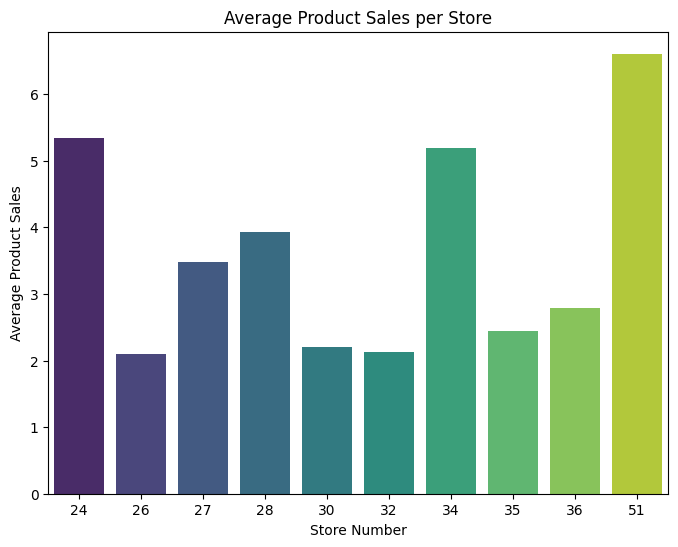

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.title('Average Product Sales per Store')
plt.ylabel('Average Product Sales')
plt.xlabel('Store Number')
plt.show()

In [30]:
# What are the largest stores (with the most items sold)
store_sales_sum = df_filled.groupby('store_nbr')['unit_sales'].sum()
store_sales_sum

,unit_sales
store_nbr,
24,2918013.000
26,1105454.000
27,1914343.000
28,1952277.354
30,900650.000
32,846230.140
34,2538898.752
35,998143.698
36,1371930.215


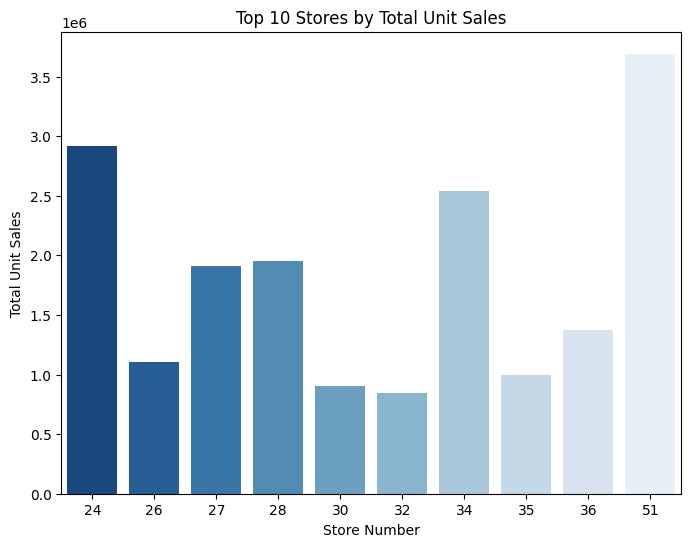

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=store_sales_sum.index, y=store_sales_sum.values, palette='Blues_r')
plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.title('Top 10 Stores by Total Unit Sales')
plt.show()

In [32]:
# Look at the time-series for item-store pair of top-seller items. Do you observe any seasonality or trend there?

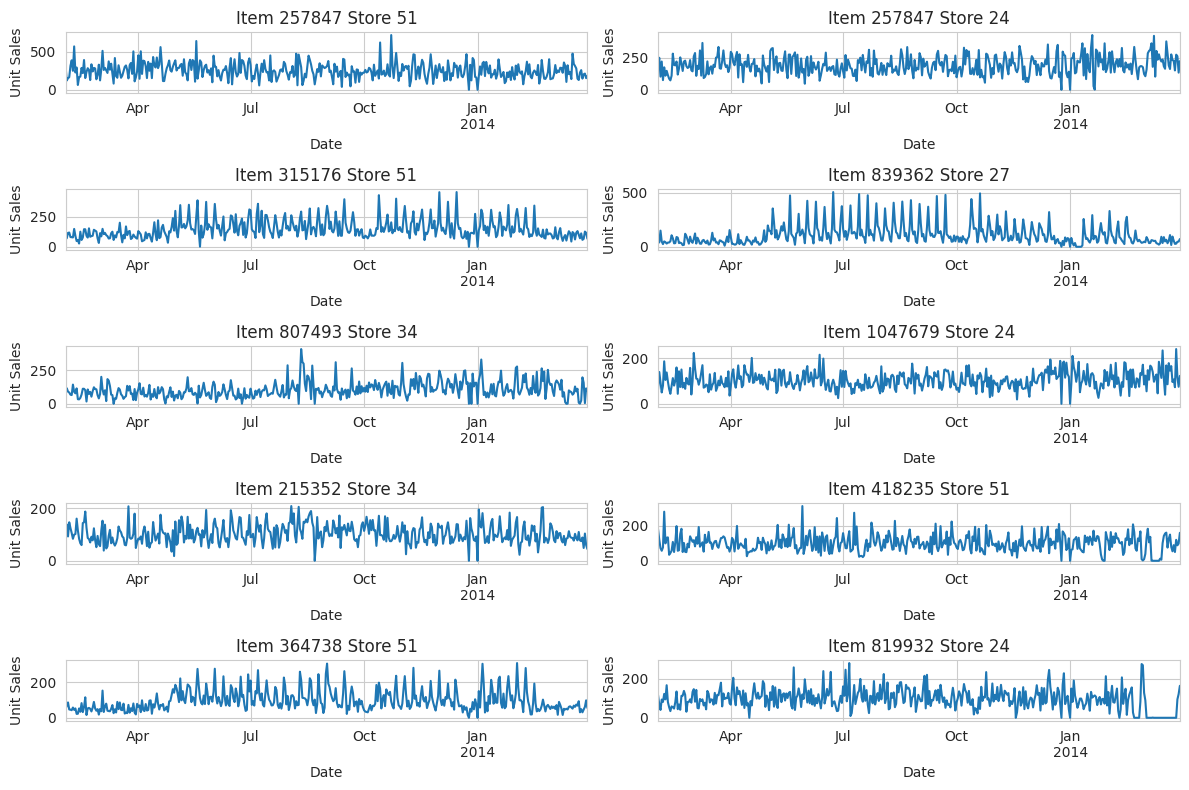

In [33]:
# Group by 'item_nbr' and 'store_nbr' to calculate total sales for each pair
top_sellers = df_filled.groupby(['item_nbr', 'store_nbr'])['unit_sales'].sum().reset_index()

# Sort by 'unit_sales' to find the top-selling items (e.g., top 10 items)
top_sellers = top_sellers.sort_values(by='unit_sales', ascending=False).head(10)

# Filter the original df_filled for top-seller item-store pairs
top_seller_data = df_filled[df_filled[['item_nbr', 'store_nbr']].apply(tuple, axis=1).isin(
    top_sellers[['item_nbr', 'store_nbr']].apply(tuple, axis=1)
)]

# Convert 'date' to datetime format
top_seller_data['date'] = pd.to_datetime(top_seller_data['date'])

# Plot time-series for each top-seller item-store pair
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

for idx, (item, store) in enumerate(top_sellers[['item_nbr', 'store_nbr']].values):
    # Filter data for current item-store pair
    item_store_data = top_seller_data[(top_seller_data['item_nbr'] == item) &
                                      (top_seller_data['store_nbr'] == store)]

    # Plot time-series
    plt.subplot(5, 2, idx + 1)  # Arrange plots in 5x2 grid
    item_store_data.groupby('date')['unit_sales'].sum().plot(title=f"Item {item} Store {store}", ax=plt.gca())
    plt.ylabel('Unit Sales')
    plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [34]:
top_sellers

,item_nbr,store_nbr,unit_sales
1365,257847,51,106538.0
1356,257847,24,80762.0
2022,315176,51,63695.0
5783,839362,27,47074.0
5555,807493,34,45133.0
7526,1047679,24,44534.0
1115,215352,34,43925.0
3159,418235,51,42468.0
2578,364738,51,41233.0
5612,819932,24,40891.0


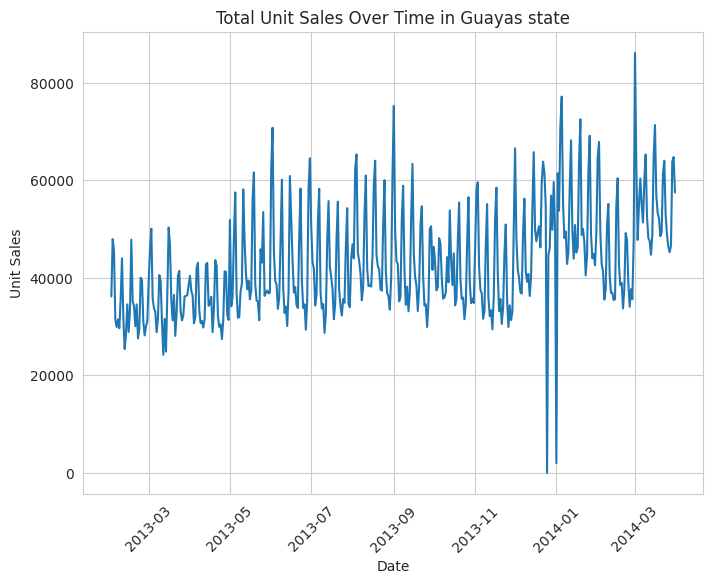

In [35]:
# Aggregating total sales by date
sales_by_date = df_filled.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(8,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.show()

#  Investigating Relationship with Oil Prices


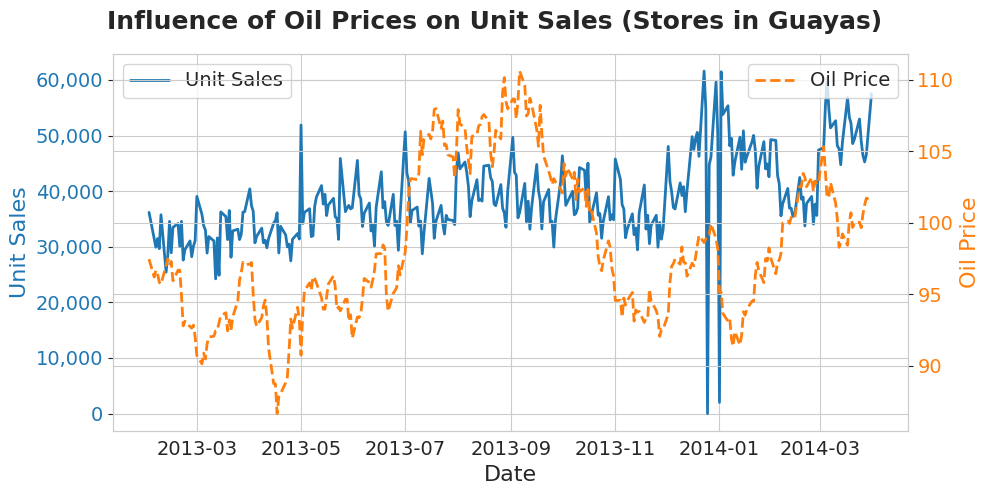

In [36]:
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter

# Ensure datetime formats for merging and plotting
df_filled['date'] = pd.to_datetime(df_filled['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])

# Aggregate unit sales data by date
unit_sales_by_date = df_filled.groupby('date')['unit_sales'].sum().reset_index()

# Merge aggregated unit sales with oil prices
merged_data = pd.merge(unit_sales_by_date, df_oil, on='date', how='left')
del df_oil, unit_sales_by_date  # clean up

# Rename columns for clarity
merged_data.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)

# Drop rows where oil price is NaN
merged_data = merged_data.dropna(subset=['oil_price'])

# Plot unit sales and oil prices
fig, ax1 = plt.subplots(figsize=(10, 5))  # Bigger figure size for better readability

# Plot unit sales on the left y-axis
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Unit Sales', fontsize=16, color='tab:blue')
ax1.plot(merged_data['date'], merged_data['unit_sales'], label='Unit Sales', color='tab:blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Format y-axis for unit sales
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plot oil prices on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Oil Price', fontsize=16, color='tab:orange')
ax2.plot(merged_data['date'], merged_data['oil_price'], label='Oil Price', color='tab:orange', linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=14)

# Add grid, titles, and legends
fig.suptitle('Influence of Oil Prices on Unit Sales (Stores in Guayas)', fontsize=18, fontweight='bold')
ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

#  Examining the Impact of Holidays

Holidays range: from 2012-03-02 till 2017-12-26


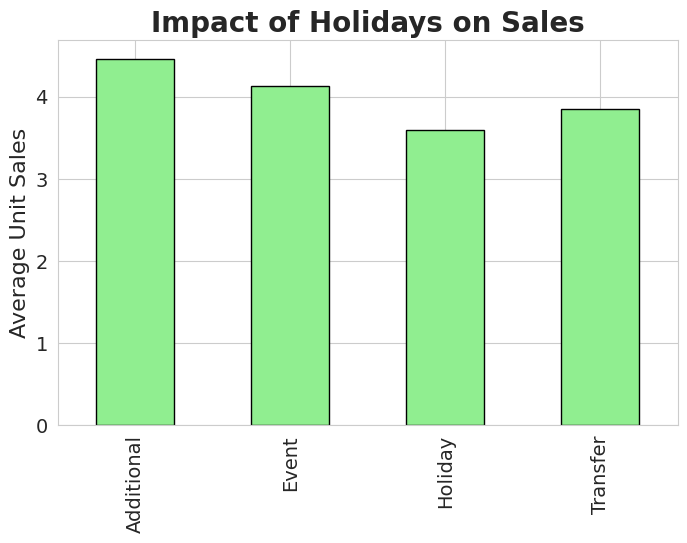

In [37]:
# Convert date column to datetime in df_filled and df_holidays_events
df_filled['date'] = pd.to_datetime(df_filled['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])

# Print the range of holiday dates
print("Holidays range: from", df_holidays_events['date'].dt.date.min(), "till", df_holidays_events['date'].dt.date.max())

# Merging df_filled data with holidays
df_filled_holiday = pd.merge(df_filled, df_holidays_events, on='date', how='left')

# Aggregating unit sales by holiday and non-holiday
holiday_sales = df_filled_holiday.groupby('type')['unit_sales'].mean()

# Plotting holiday impact
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=20, fontweight='bold')
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()